# Evaluating: Creating a Custom Evaluation Metric

Create a function representing a metric and convert it to a scorer function using scikit-learn's make_scorer

In [30]:
# Load libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Load data

digits = load_digits()

In [32]:
# Create feature matrix and target vector

features, target = digits.data, digits.target

In [33]:
# Create CV training and test scres for various trainning set sizes

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), #Classifier
                                                        features,                 # Feature matrix
                                                        target,                   # Target vector
                                                        cv = 10,                  # Number of folds
                                                        scoring = "accuracy",     # Performance Metric
                                                        n_jobs = -1,              # Use all computer cores 
                                                        train_sizes = np.linspace(0.01, 1.0,50))  # Sizes of 50 training set       

In [34]:
# Create means and standard devaitions of trainig set scores

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

In [35]:
# Create means and standard deviations of test set scores

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

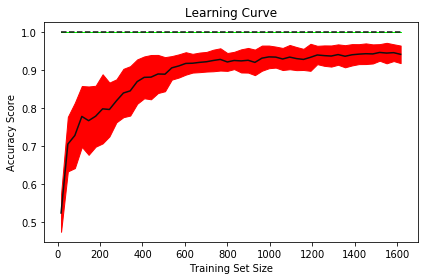

In [42]:
# Draw lines

plt.plot(train_sizes, train_mean, "--", color = "#111111", label = "Training Score")
plt.plot(train_sizes, test_mean, color = "#111111", label = "Cross Validation Score")

# Draw bands

plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color = "lime")

plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color = "red")
# Create plot

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.tight_layout()
plt.show()

Learning curves visualize the performance of a model on the training set and during cross validation as the number of observations in the training set increases. 

They are commonly used to determine if our learning algorithms would benefit from gathering additional training data.

In our solution, the accuracy of a random forest at 50 different training sizes ranging 1-100 % of observations is plotted.

The increasing accuracy score of the cross-validated models tell us that we would likely benefit from additional observations